In [ ]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.tsv.gz \
    --match "(x)-[r{label: property}]->(y{wikidatatype: wikidatatype})" \
    --return 'r.id as `id`, x as `node1`, property as `label`, y as `node2`, wikidatatype as `node2;wikidatatype`'  \
    -o ../../data/claims.edited.tsv \
    --graph-cache ~/temp1.sqlite3.db

In [ ]:
!kgtk --debug query -i ../../data/removed_statements.tsv    \
    ../../gdrive-kgtk-dump-2020-12-07/metadata.property.datatypes.tsv.gz \
    --match "removed: (x)-[r{label: property}]->(y), datatypes: (property)-[]->(datatype)" \
    --return 'r.id as `id`, x as `node1`, property as `label`, y as `node2`, datatype as `node2;wikidatatype`'  \
    -o ../../data/removed_statements_w_datatype.tsv --graph-cache ~/temp1.sqlite3.db

In [ ]:
!kgtk cat -i ../../data/claims.edited.tsv \
    ../../data/removed_statements_w_datatype.tsv \
    -o ../../data/claims.w_removed_statements.tsv

In [1]:
import gzip
from tqdm.notebook import tqdm
propFileDict = {}
fileLineCount = 1225057250
with open('../../data/claims.w_removed_statements.tsv','r') as fin: 
    headerLine = next(fin)
    for line in tqdm(fin, total = fileLineCount):
        lineP = line.rstrip().split("\t")
        if "external-id" in lineP[-1]:
            continue
        prop = lineP[2]
        if prop not in propFileDict:
            propFileDict[prop] = open("../../propertiesSplitWRemoved2/claims."+str(prop)+".tsv","w")
            propFileDict[prop].write(headerLine)
        propFileDict[prop].write(line)
    for file1 in propFileDict.values():
        file1.close()

  0%|          | 0/1225057250 [00:00<?, ?it/s]

In [2]:
!kgtk --debug query -i ../../propertiesSplitWRemoved2/claims.P996.tsv \
    ../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), c: (rLabel)-[:P2308]->(parent), d: (node1)-[]->(par), c: (eLabel)-[:P2303]->(eNode)" \
    --where 'nodeProp.label = rLabel and (par = parent or (rLabel = eLabel and node1 = eNode))' \
    --return 'nodeProp.id, node1, nodeProp.label, node2, max(parent) as `node1;ancestor`' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.all.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 19:33:50 sqlstore]: IMPORT graph directly into table graph_11 from /data/wd-correctness/propertiesSplit/claims.P996.tsv ...
[2021-03-12 19:33:51 sqlstore]: IMPORT graph directly into table graph_12 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
^C


In [4]:
!kgtk --debug query -i ../../propertiesSplitWRemoved2/claims.P996.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q1238720","Q3331189","Q47461344"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims.P996.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 22:33:26 query]: SQL Translation:
---------------------------------------------
  SELECT graph_11_c1."id", graph_11_c1."node1", graph_11_c1."label", graph_11_c1."node2"
     FROM graph_11 AS graph_11_c1, graph_14 AS graph_14_c2
     WHERE graph_11_c1."node1"=graph_14_c2."node1"
     AND (graph_14_c2."node2" IN (?, ?, ?))
  PARAS: ['Q1238720', 'Q3331189', 'Q47461344']
---------------------------------------------


In [7]:
!wc -l ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv

81289 ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv


In [8]:
!kgtk --debug query -i ../../propertiesSplitWRemoved2/claims.P991.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q40231"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims.P991.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.incorrect.tsv

[2021-03-12 22:49:54 sqlstore]: IMPORT graph directly into table graph_15 from /data/wd-correctness/propertiesSplit/claims.P991.tsv ...
[2021-03-12 22:49:54 query]: SQL Translation:
---------------------------------------------
  SELECT graph_15_c1."id", graph_15_c1."node1", graph_15_c1."label", graph_15_c1."node2"
     FROM graph_15 AS graph_15_c1, graph_5 AS graph_5_c2
     WHERE graph_15_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q40231']
---------------------------------------------
[2021-03-12 22:49:55 sqlstore]: CREATE INDEX on table graph_15 column node1 ...
[2021-03-12 22:49:55 sqlstore]: ANALYZE INDEX on table graph_15 column node1 ...


In [9]:
!kgtk --debug query -i ../../propertiesSplitWRemoved2/claims.P965.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q6023295"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims.P965.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.incorrect.tsv

[2021-03-12 23:54:56 sqlstore]: IMPORT graph directly into table graph_16 from /data/wd-correctness/propertiesSplit/claims.P965.tsv ...
[2021-03-12 23:54:56 query]: SQL Translation:
---------------------------------------------
  SELECT graph_16_c1."id", graph_5_c2."node1", graph_16_c1."label", graph_16_c1."node2"
     FROM graph_16 AS graph_16_c1, graph_5 AS graph_5_c2
     WHERE graph_16_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q6023295']
---------------------------------------------
[2021-03-12 23:54:56 sqlstore]: CREATE INDEX on table graph_16 column node1 ...
[2021-03-12 23:54:56 sqlstore]: ANALYZE INDEX on table graph_16 column node1 ...


# Generate Queries

## Type Constraint

### Understand Constraints File

In [2]:
import pandas as pd
df = pd.read_csv('../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv',sep='\t')

In [3]:
df1 = df.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [4]:
df1.head()

,node1,label,node2
0,P1001,P2308,"[Q102496, Q105985, Q1140371, Q1151067, Q119768..."
1,P1001,P2309,[Q30208840]
2,P1002,P2308,[Q630010]
3,P1002,P2309,[Q21514624]
4,P1004,P2308,"[Q2221906, Q23413, Q3947, Q41176, Q88291]"


In [5]:
df1[df1['node1'] == 'P105']

,node1,label,node2
69,P105,P2308,[Q16521]
70,P105,P2309,[Q21503252]
71,P105,P2316,[Q21502408]


### Query Generator

In [6]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
fOP = None
for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values
#         print(type1)

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'typeConstraint_Final'
        shellFileSuffix = 'typeConstraintValidator'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node1)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const120_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

if fOP:
    fOP.close()

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


In [7]:
cnt

1465

In [8]:
# import os
# for i in range(1,33):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/typeConstraintValidator"+str(i)+".sh")
    

### Analyze Violations

In [3]:
import pandas as pd
import os
from tqdm.notebook import tqdm

typeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

propList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    typeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},'propCount': 0}
    filePath = "../../allConstraintsAnalysisWRemoved2/typeConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        propList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        typeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            typeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2574 [00:00<?, ?it/s]

In [4]:
# countLines("../../allConstraintsAnalysisWRemoved2/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [5]:
recordCount = 0
for elem in typeConstViolations.keys():
    for key1 in typeConstViolations[elem].keys():
        try:
            recordCount += typeConstViolations[elem][key1]['correct'] + typeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(propList)} properties processed for type constraint for {recordCount} statements")

1465 properties processed for type constraint for 547703656 statements


In [6]:
import pandas as pd
typeConstDF = pd.DataFrame(violations).T

In [7]:
typeConstDF['violation_ratio'] = typeConstDF.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [8]:
typeConstDF.head()

,correct,incorrect,paths,violation_ratio
P1303,203148,2610,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.012685
P301,705949,28017,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.038172
P3919,3393,158,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.044495
P6185,269,12,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.042705
P3922,1824,40,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.021459


In [9]:
typeConstDF.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P538,0,10,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P5589,0,5,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P8004,0,6,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P1354,0,2,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P5051,0,81,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P6510,0,4,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P1734,0,2,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P6014,0,3,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P2303,0,44,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0
P6001,0,16,[../../allConstraintsAnalysisWRemoved2/typeCon...,1.0


In [10]:
list(typeConstDF.loc['P4945'].paths)

['../../allConstraintsAnalysisWRemoved2/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.correct.tsv',
 '../../allConstraintsAnalysisWRemoved2/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.incorrect.tsv']

In [11]:
typeConstDF['violation_ratio'].describe()

count    1465.000000
mean        0.113799
std         0.226303
min         0.000000
25%         0.006623
50%         0.022537
75%         0.085443
max         1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Type Constraint Violation Ratios')

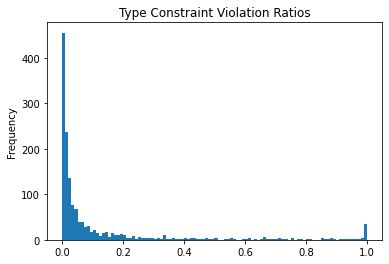

In [12]:
typeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Type Constraint Violation Ratios (<=0.05)')

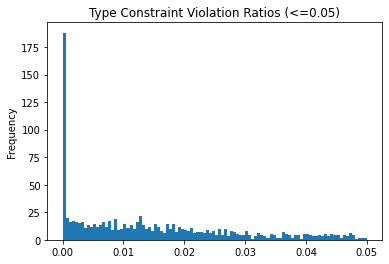

In [13]:
typeConstDF[typeConstDF['violation_ratio'] <= 0.05].violation_ratio.plot.hist(bins=100).set_title("Type Constraint Violation Ratios (<=0.05)")

In [14]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(typeConstDF['violation_ratio'] >= 5.286054)}/{len(typeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/1465


In [15]:
# typeConstDF.sort_values(by=['incorrect'],ascending=False).head(5).paths.values

In [16]:
# !cat ../../allConstraintsAnalysisWRemoved2/typeConstraint/normal/claims.type-constraints.instanceOf.P953.incorrect.tsv

In [17]:
for key1 in typeConstViolations.keys():
    typeConstViolations[key1]['correct'] = typeConstViolations[key1]['instanceOf']['correct'] + typeConstViolations[key1]['subclass']['correct'] + typeConstViolations[key1]['instanceOfOrSubclass']['correct']
    typeConstViolations[key1]['incorrect'] = typeConstViolations[key1]['instanceOf']['incorrect'] + typeConstViolations[key1]['subclass']['incorrect'] + typeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    typeConstViolations[key1]['VR'] = typeConstViolations[key1]['incorrect'] / (typeConstViolations[key1]['correct'] + typeConstViolations[key1]['incorrect'])
        

In [18]:
typeConstViolations

{'mandatory': {'instanceOf': {'correct': 46304082, 'incorrect': 795451},
  'subclass': {'correct': 2064, 'incorrect': 53},
  'instanceOfOrSubclass': {'correct': 233195, 'incorrect': 3169},
  'propCount': 167,
  'correct': 46539341,
  'incorrect': 798673,
  'VR': 0.01687170484169446},
 'suggestion': {'instanceOf': {'correct': 61936, 'incorrect': 18751},
  'subclass': {'correct': 0, 'incorrect': 0},
  'instanceOfOrSubclass': {'correct': 24237, 'incorrect': 3458},
  'propCount': 11,
  'correct': 86173,
  'incorrect': 22209,
  'VR': 0.20491410012732741},
 'normal': {'instanceOf': {'correct': 425646789, 'incorrect': 5275469},
  'subclass': {'correct': 98826, 'incorrect': 13611},
  'instanceOfOrSubclass': {'correct': 68370289, 'incorrect': 852276},
  'propCount': 1287,
  'correct': 494115904,
  'incorrect': 6141356,
  'VR': 0.012276395548962147}}

In [19]:
typeConstDF['total'] = typeConstDF['correct'] + typeConstDF['incorrect']
typeConstDF.sort_values(by=['total'],ascending=False).head()

,correct,incorrect,paths,violation_ratio,total
P2093,148843205,927027,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.006190,149770232
P1476,44059166,208472,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.004709,44267638
P577,39990807,165864,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.004130,40156671
P1433,37028672,112955,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.003041,37141627
P1215,33425605,316565,[../../allConstraintsAnalysisWRemoved2/typeCon...,0.009382,33742170


### Find out time required

In [ ]:
# from tqdm.notebook import tqdm
# import os.path

# cnt = 0
# fCnt = 1
# for prop in tqdm(df1.node1.unique()):
#     try:
#         if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
#             continue
#         relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
#         type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

#         parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
#         exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

# #         print(prop, relation, type1, parents, exceptions)

#         if relation == "Q21503252":
#             parentFile = "P31P279star"
#             parentTitle = 'instanceOf'
#         elif relation == "Q21514624":
#             parentFile = "P279star"
#             parentTitle = 'subclass'
#         else:
#             parentFile = "isastar"
#             parentTitle = 'instanceOfOrSubclass'

#         if len(type1) != 0 and type1[0][0] == "Q21502408":
#             typeVal = "mandatory"
#         elif len(type1) != 0 and type1[0][0] == "Q62026391":
#             typeVal = "suggestion"
#         else:
#             typeVal = "normal"

#         if len(exceptions):
#             exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
#         else:
#             exceptionPart = ""
        
#         if cnt % 100 == 0:
#             fOP = open("../../propertiesSplitWRemoved2/checkViolations/TimedTypeConstraintValidator" + str(fCnt) + ".sh","w")
#             fCnt += 1
        
#         fOP.write("{ time kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
#         ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
#         --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
#         --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
#         --return 'nodeProp.id, node1, nodeProp.label, node2' \
#         -o ../../allConstraintsAnalysisWRemoved2/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --graph-cache ~/sqlite3_caches/const2123_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/TimedTypeConstraint_TimedTypeConstraintValidator" + str(fCnt) + ".txt ; \
#          kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
#         --filter-on ../../allConstraintsAnalysisWRemoved2/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --filter-mode NONE \
#         --input-keys node1 label \
#         --filter-keys node1 label \
#         -o ../../allConstraintsAnalysisWRemoved2/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

#         cnt += 1
#     except:
#         print("Something failed for prop:",prop)
    

In [93]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplitWRemoved2/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("typeConstraintValidator"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [94]:
print(pd.Series(times).describe())

count    1456.000000
mean      138.470137
std       216.121977
min         2.111000
25%        23.664500
50%        43.875000
75%       158.037250
max      2177.421000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for type constraint checks')

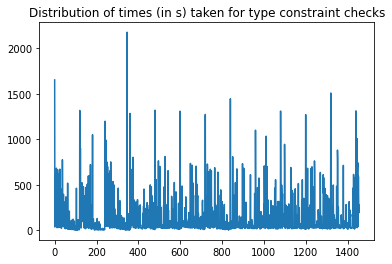

In [95]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for type constraint checks")

## Value Type Constraint

### Understand Constraints File

In [9]:
import pandas as pd
dfValueType = pd.read_csv('../../constraintsOP/valuetypeConstraint/claims.type-constraints_all1.tsv',sep='\t')

In [10]:
dfValueType = dfValueType.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [11]:
dfValueType.head()

,node1,label,node2
0,P1000,P2308,[Q1241356]
1,P1000,P2309,[Q30208840]
2,P1001,P2308,"[Q20926517, Q2881272, Q2882257, Q3624078, Q389..."
3,P1001,P2309,[Q30208840]
4,P1002,P2308,[Q2576663]


In [12]:
dfValueType['label'].unique()

array(['P2308', 'P2309', 'P2303', 'P2316', 'P6607', 'P2304'], dtype=object)

In [13]:
dfValueType[dfValueType['label'] == '2316']

,node1,label,node2


In [14]:
dfValueType[dfValueType['node1'] == 'P1659']

,node1,label,node2
330,P1659,P2308,[Q18616576]
331,P1659,P2309,[Q21503252]
332,P1659,P2316,[Q21502408]


In [15]:
dfValueType[dfValueType.node1 == 'P991']

,node1,label,node2
2031,P991,P2308,"[Q5, Q7210356]"
2032,P991,P2309,[Q21503252]


### Query Generator

In [16]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
for prop in tqdm(dfValueType.node1.unique()):
    try:
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
        relation = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2309')].node2.values[0][0]
        type1 = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2316')].node2.values
#         print(type1)

        parents = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2308')].node2.values[0]
        exceptions = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node2 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'valuetypeConstraint_Final4'
        shellFileSuffix = 'valueTypeConstraintValidator'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const112_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n")
        
        cnt += 1
    except:
        print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/932 [00:00<?, ?it/s]

Something failed for prop: P1389


In [17]:
cnt

904

In [18]:
# import os
# for i in range(1,9):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/valueTypeConstraintValidator"+str(i)+".sh")
    

### Analyze Violations

In [20]:
import pandas as pd
import os
from tqdm.notebook import tqdm

valueTypeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

valueTypePropList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    valueTypeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}, 'propCount':0}
    filePath = "../../allConstraintsAnalysisWRemoved2/valuetypeConstraint_Final4/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        valueTypePropList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        valueTypeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            valueTypeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1582 [00:00<?, ?it/s]

In [21]:
# countLines("../../allConstraintsAnalysisWRemoved2/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [22]:
recordCount = 0
for elem in valueTypeConstViolations.keys():
    for key1 in valueTypeConstViolations[elem].keys():
        try:
            recordCount += valueTypeConstViolations[elem][key1]['correct'] + valueTypeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(valueTypePropList)} properties processed for value type constraint for {recordCount} statements")

904 properties processed for value type constraint for 189304521 statements


In [23]:
import pandas as pd
valTypeConstDF = pd.DataFrame(violations).T

In [24]:
valTypeConstDF['violation_ratio'] = valTypeConstDF.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)

In [25]:
valTypeConstDF.head()

,correct,incorrect,paths,violation_ratio
P852,4526,4,[../../allConstraintsAnalysisWRemoved2/valuety...,0.000883
P853,1600,4,[../../allConstraintsAnalysisWRemoved2/valuety...,0.002494
P2302,47918,26,[../../allConstraintsAnalysisWRemoved2/valuety...,0.000542
P3092,7534,7,[../../allConstraintsAnalysisWRemoved2/valuety...,0.000928
P3096,11193,10,[../../allConstraintsAnalysisWRemoved2/valuety...,0.000893


In [26]:
valTypeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5008,0,341961,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P6104,0,9808,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P2545,0,1378,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P2668,0,179,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P7374,0,44,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P3028,0,15,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P2839,0,15,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P3027,0,13,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P2127,0,12,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0
P538,0,10,[../../allConstraintsAnalysisWRemoved2/valuety...,1.0


In [27]:
valTypeConstDF['violation_ratio'].describe()

count    904.000000
mean       0.098485
std        0.214803
min        0.000000
25%        0.001492
50%        0.011225
75%        0.063950
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios')

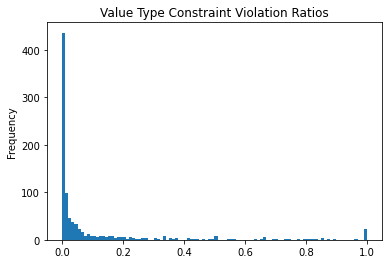

In [28]:
valTypeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios (<=0.04)')

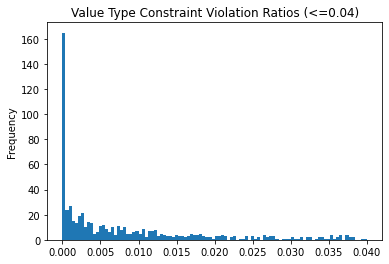

In [29]:
valTypeConstDF[valTypeConstDF['violation_ratio'] <= 0.04].violation_ratio.plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios (<=0.04)")

In [30]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(valTypeConstDF['violation_ratio'] >= 3.950680)}/{len(valTypeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/904


In [31]:
# valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head().paths.values

In [32]:
# !head ../../allConstraintsAnalysisWRemoved2/typeConstraint/normal/claims.type-constraints.instanceOf.P7535.incorrect.tsv

In [33]:
for key1 in valueTypeConstViolations.keys():
    valueTypeConstViolations[key1]['correct'] = valueTypeConstViolations[key1]['instanceOf']['correct'] + valueTypeConstViolations[key1]['subclass']['correct'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['correct']
    valueTypeConstViolations[key1]['incorrect'] = valueTypeConstViolations[key1]['instanceOf']['incorrect'] + valueTypeConstViolations[key1]['subclass']['incorrect'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    valueTypeConstViolations[key1]['VR'] = valueTypeConstViolations[key1]['incorrect'] / (valueTypeConstViolations[key1]['correct'] + valueTypeConstViolations[key1]['incorrect'])
        

In [34]:
valueTypeConstViolations

{'mandatory': {'instanceOf': {'correct': 11564885, 'incorrect': 8245},
  'subclass': {'correct': 55983, 'incorrect': 28},
  'instanceOfOrSubclass': {'correct': 13090, 'incorrect': 137},
  'propCount': 108,
  'correct': 11633958,
  'incorrect': 8410,
  'VR': 0.0007223616363956198},
 'suggestion': {'instanceOf': {'correct': 46189, 'incorrect': 659},
  'subclass': {'correct': 127, 'incorrect': 20},
  'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},
  'propCount': 5,
  'correct': 46316,
  'incorrect': 679,
  'VR': 0.01444834556867752},
 'normal': {'instanceOf': {'correct': 94112173, 'incorrect': 842434},
  'subclass': {'correct': 4674914, 'incorrect': 9777},
  'instanceOfOrSubclass': {'correct': 77686561, 'incorrect': 289299},
  'propCount': 791,
  'correct': 176473648,
  'incorrect': 1141510,
  'VR': 0.006426872643381034}}

### Find out time required

In [78]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplitWRemoved2/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("valueTypeConstraintValidator_xverify3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/297 [00:00<?, ?it/s]

In [79]:
print(pd.Series(times).describe())

count     897.000000
mean       41.756467
std       133.639231
min         1.516000
25%         3.236000
50%         6.851000
75%        24.280000
max      1683.328000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for value type constraint checks')

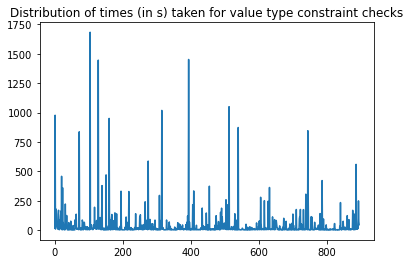

In [80]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for value type constraint checks")

## Item Requires Statement Constraint

### Understand Constraints File

In [35]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/itemRequiresConstraint/claims.type-constraints_all.tsv',sep='\t')

In [36]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [37]:
dfItemRequires['label'].unique()

array(['P2306', 'P2305', 'P2316', 'P2304', 'P2303', 'P6607', 'P4155',
       'P31', 'P2916', 'P4680', 'P2308'], dtype=object)

In [38]:
dfItemRequires['label'].value_counts()

P2306    7182
P2305    2540
P2316    2523
P2303     422
P6607      14
P2304      14
P2916       5
P4680       2
P4155       1
P2308       1
P31         1
Name: label, dtype: int64

In [39]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [40]:
dfItemRequires.head()

label                                  P2303 P2304   P2305   P2306 P2308  \
node1 id                                                                   
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN   NaN     NaN  [P214]   NaN   
P1010 P1010-P2302-Q21503247-56183614-0   NaN   NaN     NaN   [P31]   NaN   
      P1010-P2302-Q21503247-fd256eaf-0   NaN   NaN  [Q794]   [P17]   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN   NaN     NaN   [P31]   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN   NaN     NaN  [P214]   NaN   

label                                         P2316 P2916  P31 P4155 P4680  \
node1 id                                                                     
P1006 P1006-P2302-Q21503247-0451ef47-0          NaN   NaN  NaN   NaN   NaN   
P1010 P1010-P2302-Q21503247-56183614-0          NaN   NaN  NaN   NaN   NaN   
      P1010-P2302-Q21503247-fd256eaf-0  [Q21502408]   NaN  NaN   NaN   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0          NaN   NaN  NaN   NaN   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0          NaN   NaN  NaN   NaN   NaN   

label                                  P6607  
node1 id                                      
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN  
P1010 P1010-P2302-Q21503247-56183614-0   NaN  
      P1010-P2302-Q21503247-fd256eaf-0   NaN  
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN  
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN

In [41]:
dfItemRequires = dfItemRequires.droplevel(1)

In [42]:
dfItemRequires.head()

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1006,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1015,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1017,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, there is one anomaly where the property does not have a co-dependency constraint associated with it, but still has a link to this constraint.

In [43]:
dfItemRequires[dfItemRequires['P4680'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P5447,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN
P5448,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN


In [44]:
dfItemRequires[dfItemRequires['P2305'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q20808382, Q28218485, Q3044918]",[P39],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q82955],[P106],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q5],[P31],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q142, Q71084]",[P27],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
P980,NaN,NaN,[Q34],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q55],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q1852859],[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Query Generator

#### Version 1 - Mandatory + Suggestion + Normal

In [29]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Sugg_Normal"
shellFileSuffix = 'codepConst_MSN_Validator_new2_'
graph_cache_file_prefix = "codep_new3_001_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + suggestion + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 100 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplitWRemoved2/claims.P345.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2604.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1566.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1566.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2355.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P3350.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1014.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2636.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1771.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2755.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P8326.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P5128.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1627.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P954.tsv does not exist
File: ../../propertiesSplitWRemoved2

In [30]:
cnt

534

In [31]:
fCnt

6

In [123]:
# from tqdm.notebook import tqdm
# import os.path
# import os
# folderName = 'codependencyConstraint'
# for prop in tqdm(dfItemRequires.index.unique()):
#     for subFolderName in ['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal']:
#         if os.path.isfile("../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv") and \
#             os.path.isfile("../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv"):
#                 os.system("kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
#                     ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
#                     -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_w_exceptions.tsv")

In [32]:
# import os
# for i in range(1,28):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/codepConst_MSN_Validator_new2_"+str(i)+".sh")

#### Version 2 - Mandatory + Normal

In [33]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Normal"
shellFileSuffix = 'codepConst_MN_Validator_new2_'
graph_cache_file_prefix = "codep_new3_02_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 100 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplitWRemoved2/claims.P345.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2604.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1566.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2355.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1014.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2636.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1771.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2755.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P8326.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1627.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P954.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P498.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1297.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P8680.tsv does not exist
File: ../../propertiesSplitWRemoved2/

In [34]:
cnt

475

In [44]:
# import os
# for i in range(1,26):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/codepConst_MN_Validator_new2_"+str(i)+".sh")

#### Version 3 - Mandatory

In [35]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand"
shellFileSuffix = 'codepConst_M_Validator_new2_'
graph_cache_file_prefix = "codep_new3_03_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 100 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplitWRemoved2/claims.P1627.tsv does not exist


In [36]:
cnt

79

In [45]:
# import os
# for i in range(1,12):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/codepConst_M_Validator_new2_"+str(i)+".sh")

#### Version 4 - Normal

In [38]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Normal"
shellFileSuffix = 'codepConst_N_Validator_new2_'
graph_cache_file_prefix = "codep_new3_04_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 100 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplitWRemoved2/claims.P345.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2604.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1566.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2355.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1014.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2636.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1771.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P2755.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P8326.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P954.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P498.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P1297.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P8680.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P715.tsv does not exist
File: ../../propertiesSplitWRemoved2/c

In [39]:
cnt

424

In [46]:
# import os
# for i in range(1,21):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/codepConst_N_Validator_new2_"+str(i)+".sh")

#### Version 5 - Suggestion

In [41]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Suggestion"
shellFileSuffix = 'codepConst_S_Validator_new_3_'
graph_cache_file_prefix = "codep_new4_05_"

fOP = None

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = suggestion
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 100 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplitWRemoved2/claims.P1566.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P3350.tsv does not exist
File: ../../propertiesSplitWRemoved2/claims.P5128.tsv does not exist


In [42]:
cnt

97

In [46]:
# import os
# for i in range(1,5):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/codepConst_S_Validator_new_3_"+str(i)+".sh")

### Merge all correct/incorrect outputs

In [17]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysisWRemoved2/codependencyConstraint/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [15]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysisWRemoved2/codependencyConstraint_Final/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [ ]:
# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysisWRemoved2/codependencyConstraint/" + folder + "/"
#     folderPathNew = "../../allConstraintsAnalysisWRemoved2/codependencyConstraint_Final/" + folder + "/"
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.correctSuperSet.tsv --filter-on {folderPath}claims.all.correctSuperSet.tsv -o {folderPathNew}claims.all.correctSuperSet.diff.tsv")
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.incorrectSuperSet.tsv --filter-on {folderPath}claims.all.incorrectSuperSet.tsv -o {folderPathNew}claims.all.incorrectSuperSet.diff.tsv")
    

### Analyze Violations

In [71]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

codepConstViolations = {}
codepConstPropList = set()

# codepConstViolationsSummary = {}

for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal','Suggestion'])):
    filePath = "../../allConstraintsAnalysisWRemoved2/codependencyConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        codepConstPropList.add(prop)
        count1 = countLines(filePath+filename)
        if folder not in codepConstViolations:
            codepConstViolations[folder] = {}
        if prop not in codepConstViolations[folder]:
            codepConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        codepConstViolations[folder][prop][correctness] = count1
        codepConstViolations[folder][prop]['paths'].append(filePath+filename)
        
#         if folder not in codepConstViolationsSummary:
#             codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
#         codepConstViolationsSummary[folder][correctness] += count1

0it [00:00, ?it/s]

  0%|          | 0/1206 [00:00<?, ?it/s]

  0%|          | 0/1067 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [72]:
codepConstViolationsSummary = {}
for folder in codepConstViolations.keys():
    for prop in codepConstViolations[folder].keys():
        if folder not in codepConstViolationsSummary:
            codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0, 'propCount': 0}
        codepConstViolationsSummary[folder]['correct'] += codepConstViolations[folder][prop]['correct']
        codepConstViolationsSummary[folder]['incorrect'] += codepConstViolations[folder][prop]['incorrect']
        codepConstViolationsSummary[folder]['propCount'] += 1

In [73]:
for elem in codepConstViolationsSummary.keys():
    codepConstViolationsSummary[elem]['total'] = codepConstViolationsSummary[elem]['correct'] + codepConstViolationsSummary[elem]['incorrect']
    codepConstViolationsSummary[elem]['percIncorrect'] = codepConstViolationsSummary[elem]['incorrect'] / codepConstViolationsSummary[elem]['total'] * 100

In [74]:
codepConstViolationsSummary

{'Mand_Sugg_Normal': {'correct': 308616510,
  'incorrect': 4788159,
  'propCount': 534,
  'total': 313404669,
  'percIncorrect': 1.5277880241152375},
 'Mand_Normal': {'correct': 278310708,
  'incorrect': 2425281,
  'propCount': 475,
  'total': 280735989,
  'percIncorrect': 0.86390099418283},
 'Mand': {'correct': 5257741,
  'incorrect': 5365,
  'propCount': 79,
  'total': 5263106,
  'percIncorrect': 0.10193600508901018},
 'Normal': {'correct': 277367943,
  'incorrect': 2420131,
  'propCount': 424,
  'total': 279788074,
  'percIncorrect': 0.8649871902688746},
 'Suggestion': {'correct': 31544215,
  'incorrect': 2397441,
  'propCount': 97,
  'total': 33941656,
  'percIncorrect': 7.063417883912323}}

In [ ]:
mandatoryPropCount = 0
suggestionPropCount = 0
normalPropCount = 0
for prop in tqdm(dfItemRequires.index.unique()):
    if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
        continue
    prop = str(prop)
    hasMandatory = False
    hasSuggestion = False
    hasNormal = False

    for _, constraint in dfItemRequires.loc[[prop]].iterrows():
        prop2 = constraint['P2306']
            
        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
            continue
            
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                hasMandatory = True
            elif constraint['P2316'][0] == 'Q62026391':
                hasSuggestion = True
        else:
            hasNormal = True
    if hasMandatory:
        mandatoryPropCount += 1
    if hasSuggestion:
        suggestionPropCount += 1
    if hasNormal:
        normalPropCount += 1

In [ ]:
print(f"No. of props having at least 1 mandatory constraint: {mandatoryPropCount}")
print(f"No. of props having at least 1 suggestion constraint: {suggestionPropCount}")
print(f"No. of props having at least 1 normal constraint: {normalPropCount}")

#### Version 1 - Mand Sugg Normal

In [ ]:
import pandas as pd
codepConstDF1 = pd.DataFrame(codepConstViolations['Mand_Sugg_Normal']).T

In [ ]:
codepConstDF1

In [ ]:
codepConstDF1['violation_ratio'] = codepConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [ ]:
codepConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
list(codepConstDF1.loc['P2302']['paths'])

In [ ]:
!head ../../allConstraintsAnalysisWRemoved2/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv

In [ ]:
codepConstDF1.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF1['violation_ratio'].describe()

In [ ]:
codepConstDF1['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios")

In [ ]:
codepConstDF1[codepConstDF1['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF1['violation_ratio'] >= 3.539484)}/{len(codepConstDF1)}")

#### Version 2 - Mand Normal

In [ ]:
import pandas as pd
codepConstDF2 = pd.DataFrame(codepConstViolations['Mand_Normal']).T

In [ ]:
codepConstDF2

In [ ]:
codepConstDF2['violation_ratio'] = codepConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [ ]:
codepConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
codepConstDF2.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF2['violation_ratio'].describe()

In [ ]:
codepConstDF2['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios")

In [ ]:
codepConstDF2[codepConstDF2['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF2['violation_ratio'] >= 2.290915)}/{len(codepConstDF2)}")

#### Version 3 - Mand

In [ ]:
import pandas as pd
codepConstDF3 = pd.DataFrame(codepConstViolations['Mand']).T

In [ ]:
codepConstDF3

In [ ]:
codepConstDF3['violation_ratio'] = codepConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [ ]:
codepConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
codepConstDF3.loc['P1713']

In [ ]:
!head ../../allConstraintsAnalysisWRemoved2/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv

In [ ]:
!cat ../../allConstraintsAnalysisWRemoved2/codependencyConstraint/Mand/claims.P1713.incorrect.tsv

In [ ]:
codepConstDF3.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF3['violation_ratio'].describe()

In [ ]:
codepConstDF3['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios")

In [ ]:
codepConstDF3[codepConstDF3['violation_ratio'] <= 0.0005].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF3['violation_ratio'] >= 0.922928)}/{len(codepConstDF3)}")

#### Version 4 - Normal

In [ ]:
import pandas as pd
codepConstDF4 = pd.DataFrame(codepConstViolations['Normal']).T

In [ ]:
codepConstDF4

In [ ]:
codepConstDF4['violation_ratio'] = codepConstDF4.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [ ]:
codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
# list(codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(5).paths)

In [ ]:
codepConstDF4.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF4['violation_ratio'].describe()

In [ ]:
codepConstDF4['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios")

In [ ]:
codepConstDF4[codepConstDF4['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF4['violation_ratio'] >= 2.414703)}/{len(codepConstDF4)}")

### Find out time required

In [ ]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
timesVersion = {"MSN": [], "MN": [], "M": [], "N": [], "S": []}
filePath = '/data/wd-correctness/propertiesSplitWRemoved2/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("timeLog_codepConst_"):
        ver = filename.split('_')[2]
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes
        timesVersion[ver] += tempTimes
print(pd.Series(times).describe())

In [ ]:
print(pd.Series(timesVersion['MSN']).describe())

In [ ]:
print(pd.Series(timesVersion['MN']).describe())

In [ ]:
print(pd.Series(timesVersion['M']).describe())

In [ ]:
print(pd.Series(timesVersion['N']).describe())

## Symmetric Constraint (Q21510862)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [48]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510862)" \
    -o ../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-13 18:58:46 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510862']
---------------------------------------------


In [49]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv",sep='\t')

In [50]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [51]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [52]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [53]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [54]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [55]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [56]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [57]:
dfItemRequires.head()

,label,P2303,P2316
node1,id,,
P1322,P1322-P2302-Q21510862-85dea891-0,NaN,[Normal]
P1327,P1327-P2302-Q21510862-a3c3a094-0,NaN,[Normal]
P1382,P1382-P2302-Q21510862-f6bcfecf-0,NaN,[Normal]
P1560,P1560-P2302-Q21510862-fabecaeb-0,NaN,[Q21502408]
P1639,P1639-P2302-Q21510862-384edcd4-0,NaN,[Q21502408]


In [58]:
dfItemRequires = dfItemRequires.droplevel(1)

In [59]:
dfItemRequires.head()

label,P2303,P2316
node1,,
P1322,NaN,[Normal]
P1327,NaN,[Normal]
P1382,NaN,[Normal]
P1560,NaN,[Q21502408]
P1639,NaN,[Q21502408]


### Query Generator

In [60]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'symmetricConstraint'
shellFileSuffix = 'symmConst_Validator_'
graph_cache_prefix = 'symm_03'

for row in tqdm(dfItemRequires.iterrows()):
#     try:
        prop = row[0]
        constraint = row[1]
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                sfname = 'mandatory'
            elif constraint['P2316'][0] == 'Q62026391':
                sfname = 'suggestion'
            elif constraint['P2316'][0] == 'Normal':
                sfname = 'normal'
        else:
            sfname = 'normal'
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
                
        command = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
                    ../../propertiesSplitWRemoved2/claims."+ prop +".copy2.tsv \
                    --match 'tsv: (node1)-[nodeProp]->(node2), copy2: (node2)-[]->(node1)' "
        
        os.system("cp ../../propertiesSplitWRemoved2/claims."+ prop +".tsv ../../propertiesSplitWRemoved2/claims."+ prop +".copy2.tsv")
        
        if cnt % 60 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        command
        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = constraint['P2303']
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

0it [00:00, ?it/s]

In [61]:
cnt

39

In [62]:
# import os
# for i in range(1,2):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/symmConst_Validator_"+str(i)+".sh")

### Analyze Violations

In [47]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysisWRemoved2/symmetricConstraint/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
len(symmConstPropList)

39

In [49]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

In [50]:
symmConstViolationsSummary

{'mandatory': {'correct': 7768,
  'incorrect': 41,
  'total': 7809,
  'percIncorrect': 0.525035215776668,
  'propCount': 5},
 'normal': {'correct': 14155303,
  'incorrect': 3484987,
  'total': 17640290,
  'percIncorrect': 19.755837347345196,
  'propCount': 31},
 'suggestion': {'correct': 819403,
  'incorrect': 33067,
  'total': 852470,
  'percIncorrect': 3.8789634825858976,
  'propCount': 3}}

In [51]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

18500569

In [52]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1639,2105,25,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.011737
P1560,3488,15,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.004282
P3364,1813,1,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.000551
P2152,80,0,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.000000
P6185,282,0,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.000000


In [53]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2789,105201,6590,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.058949
P1889,533338,24740,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.044331
P197,180864,1737,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.009513


In [54]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5188,0,5,[../../allConstraintsAnalysisWRemoved2/symmetr...,1.000000
P5974,0,1,[../../allConstraintsAnalysisWRemoved2/symmetr...,1.000000
P1706,12,84,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.875000
P2652,500,836,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.625749
P521,424,146,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.256140
P684,12091769,3437304,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.221346
P3032,1743,316,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.153473
P1382,11075,1657,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.130145
P2293,14736,1969,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.117869
P1327,7954,706,[../../allConstraintsAnalysisWRemoved2/symmetr...,0.081524


In [55]:
# !head ../../allConstraintsAnalysisWRemoved2/symmetricConstraint/normal/claims.P3032.incorrect.tsv



Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

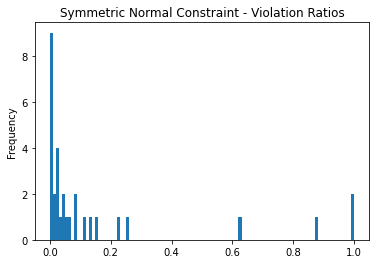

In [56]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

### Find out time required

In [11]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplitWRemoved2/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("symmConst_Validator_"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/108 [00:00<?, ?it/s]

In [12]:
print(pd.Series(times).describe())

count     38.000000
mean      15.315868
std       61.526228
min        2.069000
25%        2.617750
50%        3.003000
75%        5.889250
max      383.135000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

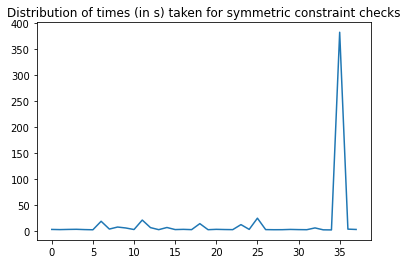

In [13]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

## Inverse Constraint (Q21510855)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [63]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510855)" \
    -o ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-13 19:00:13 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510855']
---------------------------------------------


In [64]:
!head ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv

id	node1	label	node2	rank	node2;wikidatatype
P1026-P2302-Q21510855-adc83b86-0	P1026	P2302	Q21510855	normal	wikibase-item
P1029-P2302-Q21510855-6b55e057-0	P1029	P2302	Q21510855	normal	wikibase-item
P115-P2302-Q21510855-f7aa0b78-0	P115	P2302	Q21510855	normal	wikibase-item
P1151-P2302-Q21510855-0d9aa9c6-0	P1151	P2302	Q21510855	normal	wikibase-item
P1204-P2302-Q21510855-e3d53bb6-0	P1204	P2302	Q21510855	normal	wikibase-item
P1283-P2302-Q21510855-0e7699bb-0	P1283	P2302	Q21510855	normal	wikibase-item
P1308-P2302-Q21510855-2aba96b7-0	P1308	P2302	Q21510855	normal	wikibase-item
P1365-P2302-Q21510855-c809b758-0	P1365	P2302	Q21510855	normal	wikibase-item
P1366-P2302-Q21510855-eee12ef8-0	P1366	P2302	Q21510855	normal	wikibase-item


In [65]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/inverseConstraint/claims.constraints_list.tsv",sep='\t')

In [66]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [67]:
constDF2.to_csv("../../constraintsOP/inverseConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [68]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/inverseConstraint/claims.constraints_all.tsv',sep='\t')

In [69]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [70]:
dfItemRequires['label'].unique()

array(['P2306', 'P2316', 'P4155', 'P2303'], dtype=object)

In [71]:
dfItemRequires['label'].value_counts()

P2306    110
P2316     10
P2303      2
P4155      1
Name: label, dtype: int64

In [72]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [73]:
dfItemRequires.head()

,label,P2303,P2306,P2316,P4155
node1,id,,,,
P1026,P1026-P2302-Q21510855-adc83b86-0,NaN,[P50],NaN,NaN
P1029,P1029-P2302-Q21510855-6b55e057-0,NaN,[P5096],NaN,NaN
P115,P115-P2302-Q21510855-f7aa0b78-0,NaN,[P466],NaN,NaN
P1151,P1151-P2302-Q21510855-0d9aa9c6-0,NaN,[P1204],[Q21502408],NaN
P1204,P1204-P2302-Q21510855-e3d53bb6-0,NaN,[P1151],NaN,NaN


In [74]:
dfItemRequires = dfItemRequires.droplevel(1)

In [75]:
dfItemRequires.head()

label,P2303,P2306,P2316,P4155
node1,,,,
P1026,NaN,[P50],NaN,NaN
P1029,NaN,[P5096],NaN,NaN
P115,NaN,[P466],NaN,NaN
P1151,NaN,[P1204],[Q21502408],NaN
P1204,NaN,[P1151],NaN,NaN


### Query Generator

In [76]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0
fOP = None

folderName = 'inverseConstraint_Final'
shellFileSuffix = 'invConst_Validator_new3_'
graph_cache_file_prefix = "inv_4_"

for prop, constraint in tqdm(dfItemRequires.iterrows()):
#     try:
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                subFolderName = "mandatory"
            elif constraint['P2316'][0] == 'Q62026391':
                subFolderName = "suggestion"
        else:
            subFolderName = "normal"
        
        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
            continue
            
        prop2 = constraint['P2306']

        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplitWRemoved2/claims.{prop2}.tsv does not exist")
            continue
        
        if cnt % 40 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplitWRemoved2/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
            
        command = "{ time ( kgtk --debug query -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
                        ../../propertiesSplitWRemoved2/claims."+ prop2 +".tsv \
                        --match '"+ \
                        f"{prop}: (node1)-[nodeProp]->(node2), {prop2}: (node2)-[]->(node1)' "

        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = set(constraint['P2303'])
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplitWRemoved2/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
#             print(command)        
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysisWRemoved2/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplitWRemoved2/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

0it [00:00, ?it/s]

In [77]:
cnt

110

In [78]:
# import os
# for i in range(1,7):
#     os.system("screen -dm sh ../../propertiesSplitWRemoved2/checkViolations/invConst_Validator_new3_"+str(i)+".sh")

### Analyze Violations

In [57]:
import pandas as pd
import os
from tqdm.notebook import tqdm

invConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

invConstViolations = {}
invConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysisWRemoved2/inverseConstraint_Final/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        invConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in invConstViolations:
            invConstViolations[folder] = {}
        if prop not in invConstViolations[folder]:
            invConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        invConstViolations[folder][prop][correctness] = count1
        invConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [58]:
len(invConstPropList)

110

In [59]:
invConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    invConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in invConstViolations[folder].keys():
        invConstViolationsSummary[folder]['correct'] += invConstViolations[folder][prop]['correct']
        invConstViolationsSummary[folder]['incorrect'] += invConstViolations[folder][prop]['incorrect']
    invConstViolationsSummary[folder]['total'] = invConstViolationsSummary[folder]['correct'] + invConstViolationsSummary[folder]['incorrect']
    invConstViolationsSummary[folder]['percIncorrect'] = invConstViolationsSummary[folder]['incorrect'] / invConstViolationsSummary[folder]['total'] * 100
    invConstViolationsSummary[folder]['propCount'] = len(invConstViolations[folder].keys())

0it [00:00, ?it/s]

In [60]:
invConstViolationsSummary

{'mandatory': {'correct': 6872,
  'incorrect': 143,
  'total': 7015,
  'percIncorrect': 2.0384889522451886,
  'propCount': 6},
 'normal': {'correct': 7489249,
  'incorrect': 328065,
  'total': 7817314,
  'percIncorrect': 4.1966460602708295,
  'propCount': 100},
 'suggestion': {'correct': 2150990,
  'incorrect': 99214,
  'total': 2250204,
  'percIncorrect': 4.409111351681892,
  'propCount': 4}}

In [61]:
noOfStmts = 0
for fold in invConstViolationsSummary.keys():
    noOfStmts += invConstViolationsSummary[fold]['total']
noOfStmts

10074533

In [62]:
invConstDF1 = pd.DataFrame(invConstViolations['mandatory']).T
invConstDF1['violation_ratio'] = invConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2673,839,67,[../../allConstraintsAnalysisWRemoved2/inverse...,0.073951
P4147,286,8,[../../allConstraintsAnalysisWRemoved2/inverse...,0.027211
P4149,286,4,[../../allConstraintsAnalysisWRemoved2/inverse...,0.013793
P2033,1879,25,[../../allConstraintsAnalysisWRemoved2/inverse...,0.013130
P450,1779,22,[../../allConstraintsAnalysisWRemoved2/inverse...,0.012215
P1151,1803,17,[../../allConstraintsAnalysisWRemoved2/inverse...,0.009341


In [63]:
invConstDF2 = pd.DataFrame(invConstViolations['suggestion']).T
invConstDF2['violation_ratio'] = invConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1434,3677,5003,[../../allConstraintsAnalysisWRemoved2/inverse...,0.576382
P155,1036647,53103,[../../allConstraintsAnalysisWRemoved2/inverse...,0.048730
P156,1036636,40868,[../../allConstraintsAnalysisWRemoved2/inverse...,0.037928
P629,74030,240,[../../allConstraintsAnalysisWRemoved2/inverse...,0.003231


In [64]:
invConstDF3 = pd.DataFrame(invConstViolations['normal']).T
invConstDF3['violation_ratio'] = invConstDF3.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1605,13,190,[../../allConstraintsAnalysisWRemoved2/inverse...,0.935961
P3448,605,4575,[../../allConstraintsAnalysisWRemoved2/inverse...,0.883205
P926,1,5,[../../allConstraintsAnalysisWRemoved2/inverse...,0.833333
P925,1,5,[../../allConstraintsAnalysisWRemoved2/inverse...,0.833333
P1029,490,2397,[../../allConstraintsAnalysisWRemoved2/inverse...,0.830274
P115,6948,24721,[../../allConstraintsAnalysisWRemoved2/inverse...,0.780606
P5134,23,54,[../../allConstraintsAnalysisWRemoved2/inverse...,0.701299
P3816,14,27,[../../allConstraintsAnalysisWRemoved2/inverse...,0.658537
P1283,1405,2423,[../../allConstraintsAnalysisWRemoved2/inverse...,0.632968
P8625,9,15,[../../allConstraintsAnalysisWRemoved2/inverse...,0.625000


In [65]:
!head ../../allConstraintsAnalysisWRemoved2/inverseConstraint/normal/claims.P925.incorrect.tsv

head: cannot open ‘../../allConstraintsAnalysisWRemoved2/inverseConstraint/normal/claims.P925.incorrect.tsv’ for reading: No such file or directory


Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

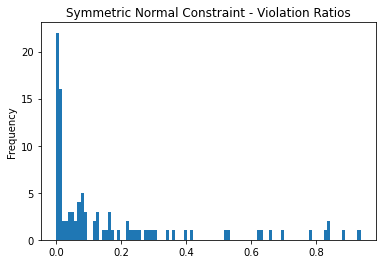

In [66]:
invConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

### Find out time required

In [55]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplitWRemoved2/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("invConst_Validator_new3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [56]:
print(pd.Series(times).describe())

count    110.000000
mean       7.526318
std       11.686634
min        1.519000
25%        2.624000
50%        3.298500
75%        6.463250
max       80.846000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

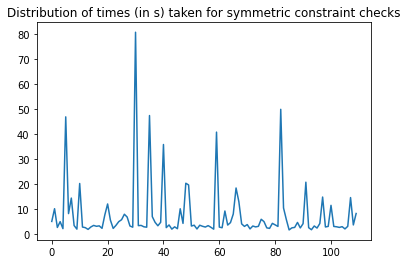

In [57]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

# Analysis on properties with constraints

In [26]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->()" \
    -o ../../constraintsOP/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-03 09:14:12 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
  PARAS: ['P2302']
---------------------------------------------


In [39]:
!kgtk unique -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz --column node1 -o ../../constraintsOP/claims.propList.tsv

In [42]:
!head ../../constraintsOP/claims.propList.tsv

node1	label	node2
P10	count	17
P1000	count	10
P1001	count	26
P1002	count	9
P1003	count	20
P1004	count	33
P1005	count	21
P1006	count	26
P1007	count	19


In [43]:
import pandas as pd
import os
props = pd.read_csv("../../constraintsOP/claims.constraints_list.tsv", sep='\t')

In [44]:
props2 = props.groupby(['node1']).node2.apply(list)

In [45]:
len(props2)

8100

In [48]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2336, 8100)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object

In [32]:
import pandas as pd
import os
props2 = pd.read_csv("../../constraintsOP/claims.propList.tsv", sep='\t')

In [33]:
props2 = props2.groupby(['node1']).node2.apply(list)

In [34]:
len(props2)

8193

In [35]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplitWRemoved2/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2415, 8193)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object